**<span style="color: #808080;">In The Name of God</span>**

---

**<span style="color: #808080;">Mani hosseini</span>**

**<span style="color: #808080;">SID:</span> <span style="color: #808080;">810102552</span>**

# <span style="color:rgb(143, 0, 255);">Task #1</span>
# <span style="color: #8F00FF;">Langevin Dynamics
</span>


## <span style="color: #808080;">Part 1:</span>  


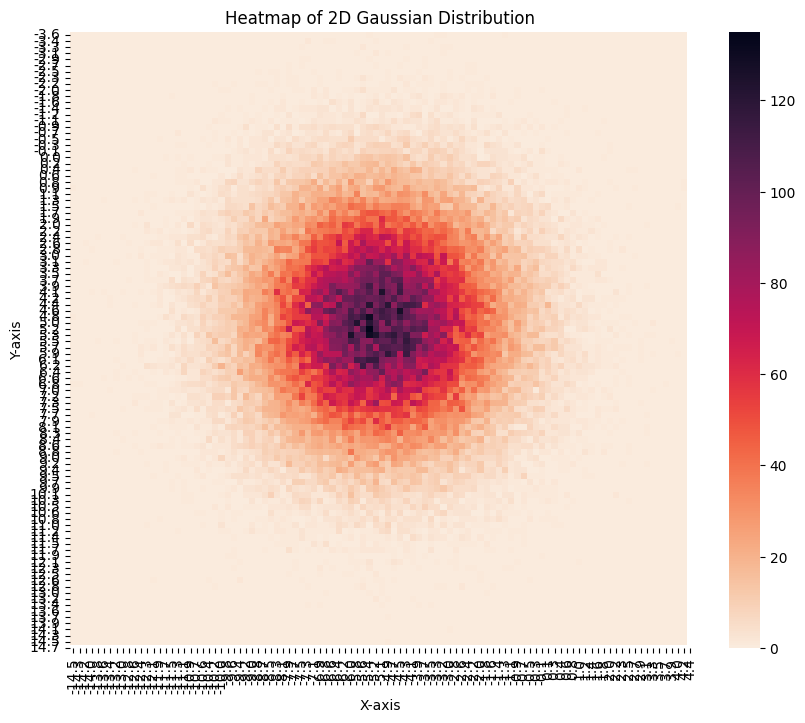

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.random import multivariate_normal

# Generate samples
mean = np.array([-5, 5])
cov = np.array([[5, 0], [0, 5]])
samples = multivariate_normal(mean, cov, 100000)

# Create 2D histogram
heatmap, xedges, yedges = np.histogram2d(samples[:, 0], samples[:, 1], bins=100)

# Adjust axis labels to match actual data range
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap.T, cmap="rocket_r", xticklabels=xedges.round(1), yticklabels=yedges.round(1))
plt.title("Heatmap of 2D Gaussian Distribution")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()


## <span style="color: #808080;">Part 2:</span>  
### **Score Function for a 2D Gaussian**

$$
\nabla_{\mathbf{x}} \log p(\mathbf{x}) = -\Sigma^{-1} (\mathbf{x} - \boldsymbol{\mu})
$$

$$ \boldsymbol{\mu} = [-5, 5] $$
$$ \Sigma = \begin{bmatrix} 5 & 0 \\ 0 & 5 \end{bmatrix} $$


$$
\Sigma^{-1} = \begin{bmatrix} \frac{1}{5} & 0 \\ 0 & \frac{1}{5} \end{bmatrix}
$$

$$
\nabla_{\mathbf{x}} \log p(\mathbf{x}) = -\begin{bmatrix} \frac{1}{5} & 0 \\ 0 & \frac{1}{5} \end{bmatrix} \begin{bmatrix} x_1 + 5 \\ x_2 - 5 \end{bmatrix} = -\begin{bmatrix} \frac{x_1 + 5}{5} \\ \frac{x_2 - 5}{5} \end{bmatrix}
$$


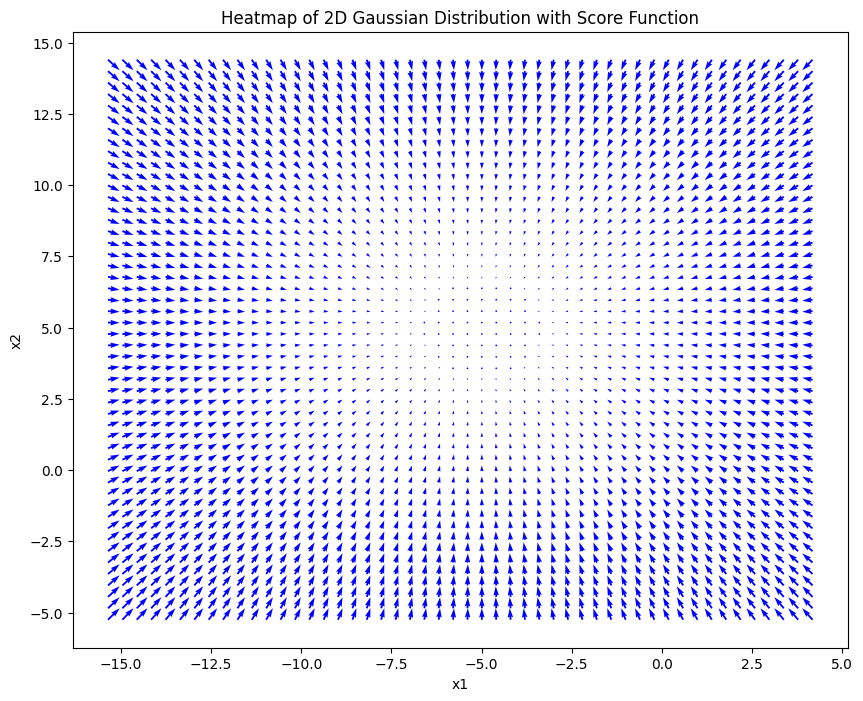

In [ ]:
mean = [-5, 5] 
cov = [[5, 0], [0, 5]]


def score_function(x, mean, cov):
    inv_cov = np.linalg.inv(cov)
    return -inv_cov @ (x - mean)  



x1 = np.linspace(xedges[0], xedges[-1], 50) 
x2 = np.linspace(yedges[0], yedges[-1], 50)  


x1_table = np.zeros((len(x2), len(x1))) 
x2_table = np.zeros((len(x2), len(x1)))  

for i in range(len(x1)):
    for j in range(len(x2)):
        pos = np.array([x1[i], x2[j]])
        score = score_function(pos, mean, cov) 
        x1_table[j, i] = score[0] 
        x2_table[j, i] = score[1] 



plt.figure(figsize=(10, 8))
sns.heatmap(heatmap, cmap="rocket_r")
plt.title("Heatmap of 2D Gaussian Distribution with Score Function")
plt.xlabel("x1")
plt.ylabel("x2")
plt.quiver(x1, x2, x1_table, x2_table, color='blue')
plt.show()